In [1]:
import scanpy as sc
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 


In [3]:
datapath='processed_vizgen_liver/mapping/'

In [4]:
ad_tan=sc.read_h5ad(datapath+'sc_genes_spatial_cell.h5ad')

In [5]:
ad_tan

AnnData object with n_obs × n_vars = 87210 × 18541
    obs: 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'overlap_genes', 'training_genes'

In [6]:
ad_sp=sc.read(datapath+'Blank_genes_removed.csv').transpose()
ad_sp.var_names_make_unique()
ad_sp

AnnData object with n_obs × n_vars = 395215 × 347

In [7]:
sp_gene=ad_sp.var_names.to_numpy()
tan_gene=ad_tan.var_names.to_numpy()
print(sp_gene[0:5],tan_gene[0:5])
print(len(sp_gene),len(tan_gene))

['Comt' 'Ldha' 'Pck1' 'Akr1a1' 'Ugt2b1'] ['sox17' 'mrpl15' 'lypla1' 'gm37988' 'tcea1']
347 18541


In [9]:
d={}
for i in range(len(tan_gene)):
    d[tan_gene[i]]=i
    
index_sp=[]
index_tan=[]
for i in range(len(sp_gene)):
    name=sp_gene[i].lower()
    flag=1
    try:
        d[name]
    except KeyError:
        flag=0
    if flag==1:    
        index_tan.append(d[name])
        index_sp.append(i)
    
print(len(index_tan),len(index_sp))    

322 322


In [17]:
sc.pp.normalize_total(ad_sp,inplace=True)
sc.pp.log1p(ad_sp)

/home/sclab/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [18]:
data=[]
gname=[]
for i in range(len(index_tan)):
    mu1=np.mean(ad_tan.X[:,index_tan[i]])
    mu2=np.mean(ad_sp.X[:,index_sp[i]])
    data.append([mu1,mu2])
    gname.append(sp_gene[index_sp[i]])
    
data=np.array(data)    
        


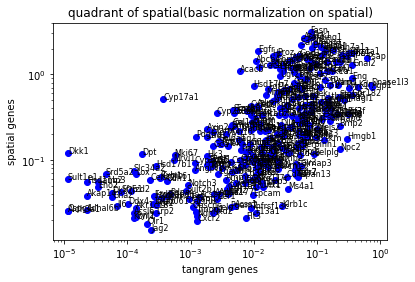

In [20]:
plt.figure()
plt.plot(data[:,0],data[:,1],'bo')
for i in range(len(gname)):
    plt.text(data[i,0],data[i,1],gname[i],fontsize=8)
plt.ylabel('spatial genes')
plt.xlabel('tangram genes')
plt.yscale('log')
plt.xscale('log')
plt.title('quadrant of spatial(basic normalization on spatial)')
plt.show()